In [2]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
    -O /tmp/sign-language-img.zip

--2024-03-12 10:33:39--  https://storage.googleapis.com/platzi-tf2/sign-language-img.zip
Resolviendo storage.googleapis.com (storage.googleapis.com)... 192.178.52.219, 192.178.56.27, 142.251.34.59, ...
Conectando con storage.googleapis.com (storage.googleapis.com)[192.178.52.219]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 24265584 (23M) [application/zip]
Guardando como: ‘/tmp/sign-language-img.zip’

/tmp/sign-language- 100%[===================>]  23.14M   432KB/s    en 65s     

2024-03-12 10:34:44 (363 KB/s) - ‘/tmp/sign-language-img.zip’ guardado [24265584/24265584]



In [3]:
import os
import zipfile

local_zip = "/tmp/sign-language-img.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/sign-language-img")
zip_ref.close()

In [4]:
!ls /tmp/sign-language-img/Test/
!ls /tmp/sign-language-img/Train/

A  B  C  D  E  F  G  H	I  K  L  M  N  O  P  Q	R  S  T  U  V  W  X  Y
A  B  C  D  E  F  G  H	I  K  L  M  N  O  P  Q	R  S  T  U  V  W  X  Y


In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-03-12 10:49:11.323769: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 10:49:11.394678: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 10:49:11.791467: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 10:49:11.791693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 10:49:11.860935: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [6]:
train_dir = "/tmp/sign-language-img/Train/"
test_dir = "/tmp/sign-language-img/Test/"

In [7]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

Found 27455 images belonging to 24 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

Found 1425 images belonging to 24 classes.


In [10]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale")

Found 7172 images belonging to 24 classes.


In [11]:
classes = [char for char in string.ascii_uppercase if char !="J" if char != "Z"]

In [12]:
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [13]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (10, 10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [14]:
#!pip install scipy
import scipy.integrate as integrate
import scipy

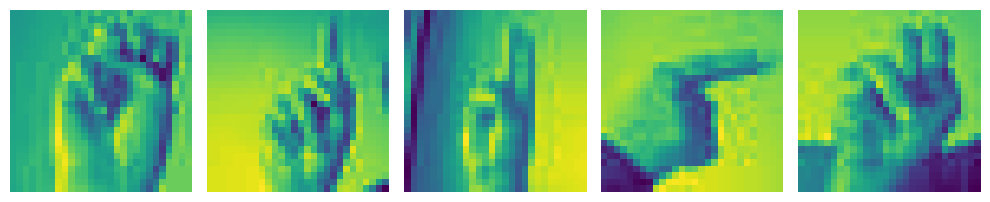

In [15]:
sample_training_images, _ = next(train_generator)
plot_images(sample_training_images[:5])

In [16]:
model_base = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [17]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236952 (925.59 KB)
Trainable params: 236952 (925.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [19]:
history = model_base.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator
)

Epoch 1/30
215/215 [==============================] - 9s 39ms/step - loss: 2.2603 - accuracy: 0.3343 - val_loss: 1.7568 - val_accuracy: 0.4575
Epoch 2/30
215/215 [==============================] - 5s 21ms/step - loss: 1.3146 - accuracy: 0.5929 - val_loss: 1.3792 - val_accuracy: 0.5818
Epoch 3/30
215/215 [==============================] - 5s 21ms/step - loss: 0.9593 - accuracy: 0.7064 - val_loss: 1.2197 - val_accuracy: 0.6470
Epoch 4/30
215/215 [==============================] - 5s 21ms/step - loss: 0.7338 - accuracy: 0.7782 - val_loss: 1.1667 - val_accuracy: 0.6309
Epoch 5/30
215/215 [==============================] - 5s 25ms/step - loss: 0.5618 - accuracy: 0.8303 - val_loss: 1.0572 - val_accuracy: 0.6646
Epoch 6/30
215/215 [==============================] - 5s 25ms/step - loss: 0.4332 - accuracy: 0.8739 - val_loss: 0.9891 - val_accuracy: 0.6961
Epoch 7/30
215/215 [==============================] - 5s 23ms/step - loss: 0.3303 - accuracy: 0.9089 - val_loss: 1.0191 - val_accuracy: 0.6877

In [48]:
results = model_base.evaluate(test_generator)

57/57 [==============================] - 2s 29ms/step - loss: 1.2902 - accuracy: 0.7833


In [20]:
def visualice_results(history):
    epochs = [i for i in range(30)]
    fig, ax = plt.subplots(1, 2)
    train_acc = history.history["accuracy"]
    train_loss = history.history["loss"]
    val_acc = history.history["val_accuracy"]
    val_loss = history.history["val_loss"]
    fig.set_size_inches(16, 9)

    ax[0].plot(epochs, train_acc, "go-", label = "Entrenamiento accuracy")
    ax[0].plot(epochs, val_acc, "ro-", label = "Validacion accuracy")
    ax[0].set_title("Entrenamiento y validacion accuracy")
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs, train_loss, "go-", label = "Entrenamiento loss")
    ax[1].plot(epochs, val_loss, "ro-", label = "Validacion loss")
    ax[1].set_title("Entrenamiento y validacion loss")
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    plt.show()

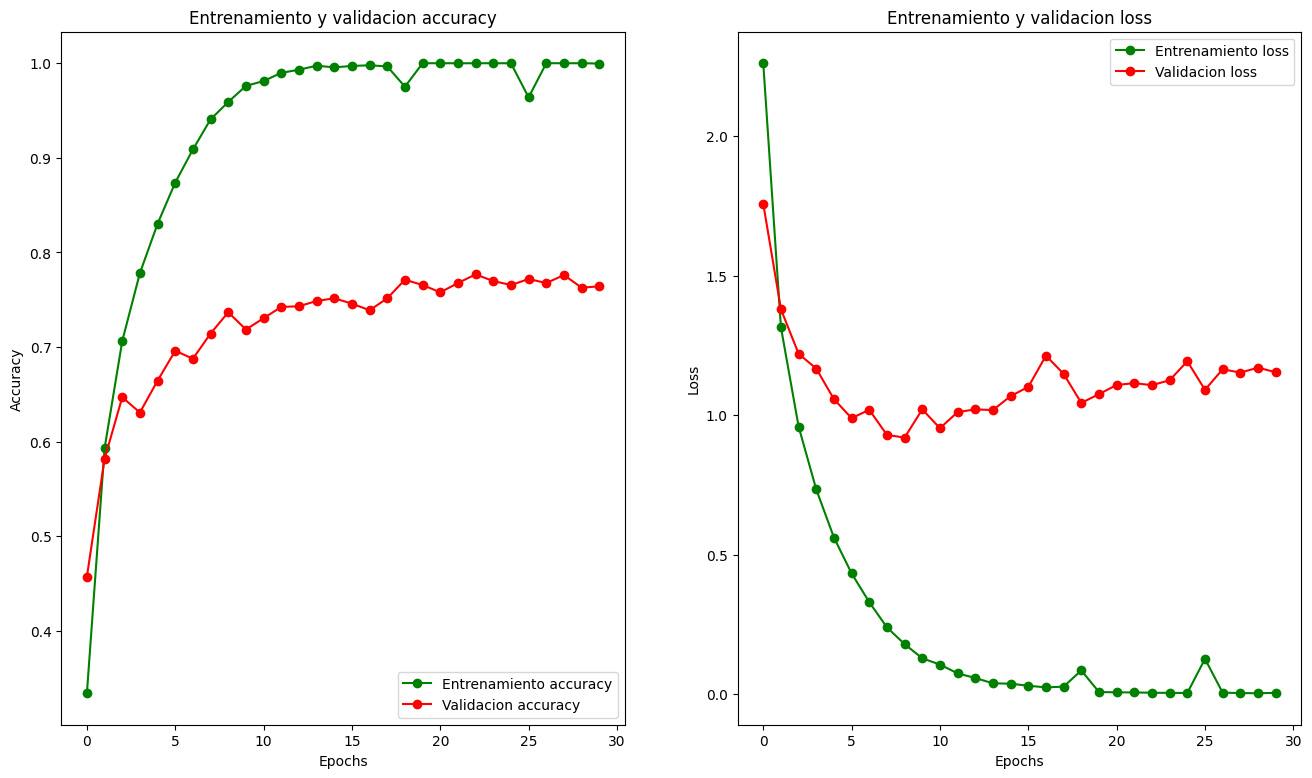

In [21]:
visualice_results(history)

In [22]:
from tensorflow.keras import regularizers

In [23]:
model_optimazer = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(12-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [24]:
model_optimazer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236952 (925.59 KB)
Trainable params: 236

In [25]:
model_optimazer.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [26]:
history_optimazer = model_optimazer.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator
)

Epoch 1/30
215/215 [==============================] - 6s 26ms/step - loss: 205.5135 - accuracy: 0.1096 - val_loss: 3.6054 - val_accuracy: 0.0961
Epoch 2/30
215/215 [==============================] - 5s 22ms/step - loss: 3.0293 - accuracy: 0.1254 - val_loss: 2.8811 - val_accuracy: 0.1488
Epoch 3/30
215/215 [==============================] - 5s 22ms/step - loss: 2.7168 - accuracy: 0.1814 - val_loss: 2.5970 - val_accuracy: 0.1846
Epoch 4/30
215/215 [==============================] - 5s 22ms/step - loss: 2.5280 - accuracy: 0.2178 - val_loss: 2.4949 - val_accuracy: 0.2091
Epoch 5/30
215/215 [==============================] - 5s 22ms/step - loss: 2.4103 - accuracy: 0.2503 - val_loss: 2.4127 - val_accuracy: 0.2330
Epoch 6/30
215/215 [==============================] - 5s 22ms/step - loss: 2.3054 - accuracy: 0.2768 - val_loss: 2.3728 - val_accuracy: 0.2379
Epoch 7/30
215/215 [==============================] - 5s 22ms/step - loss: 2.2181 - accuracy: 0.2981 - val_loss: 2.2318 - val_accuracy: 0.30

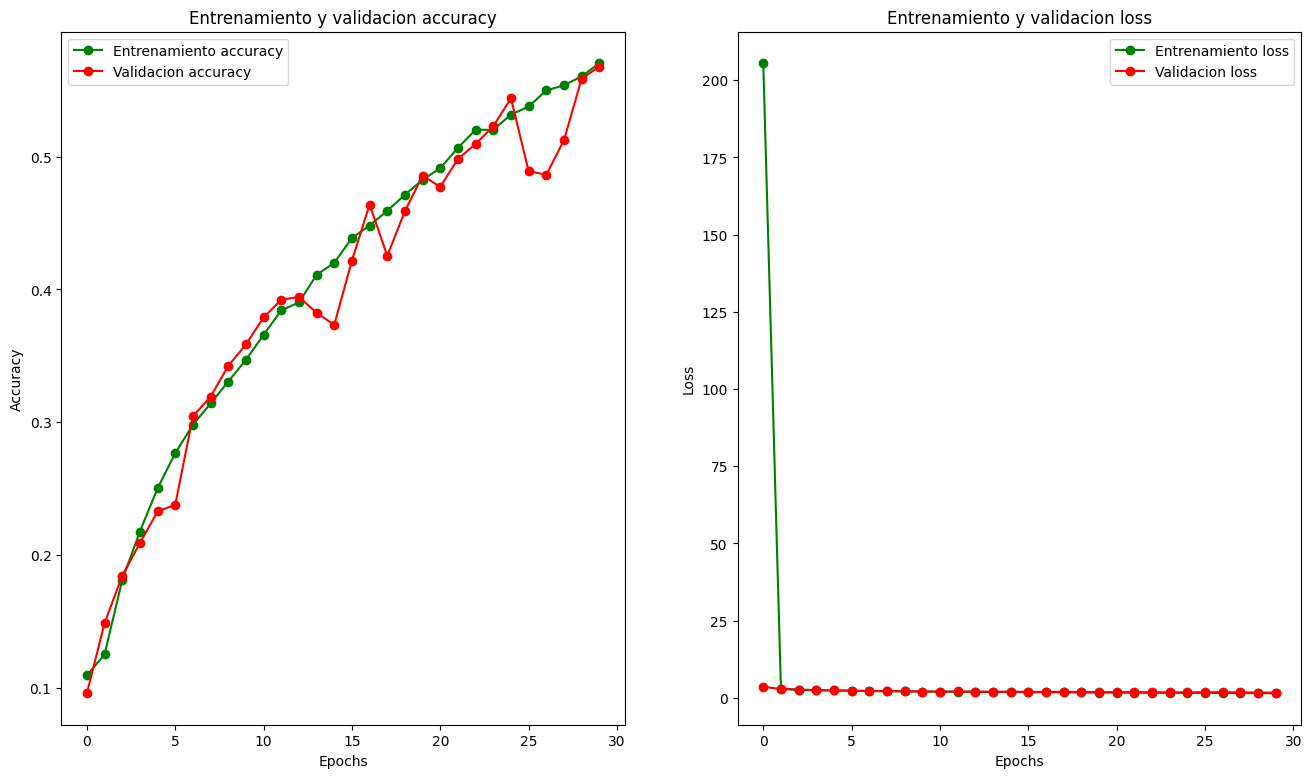

In [27]:
visualice_results(history_optimazer)

In [28]:
model_convulotional = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(12-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [29]:
model_convulotional.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 75)        0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 12675)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

In [30]:
model_convulotional.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [31]:
history_convulotional =  model_convulotional.fit(
    train_generator, 
    epochs = 30,
    validation_data = validation_generator
)

Epoch 1/30
215/215 [==============================] - 14s 60ms/step - loss: 203.3530 - accuracy: 0.2405 - val_loss: 2.7184 - val_accuracy: 0.4625
Epoch 2/30
215/215 [==============================] - 13s 60ms/step - loss: 2.0076 - accuracy: 0.4674 - val_loss: 1.6645 - val_accuracy: 0.6077
Epoch 3/30
215/215 [==============================] - 14s 65ms/step - loss: 1.5066 - accuracy: 0.6205 - val_loss: 1.5350 - val_accuracy: 0.6225
Epoch 4/30
215/215 [==============================] - 14s 66ms/step - loss: 1.2689 - accuracy: 0.7010 - val_loss: 1.3902 - val_accuracy: 0.6582
Epoch 5/30
215/215 [==============================] - 14s 66ms/step - loss: 1.1098 - accuracy: 0.7551 - val_loss: 1.2387 - val_accuracy: 0.7186
Epoch 6/30
215/215 [==============================] - 14s 66ms/step - loss: 0.9919 - accuracy: 0.7989 - val_loss: 1.2303 - val_accuracy: 0.7102
Epoch 7/30
215/215 [==============================] - 14s 66ms/step - loss: 0.9103 - accuracy: 0.8300 - val_loss: 1.1419 - val_accurac

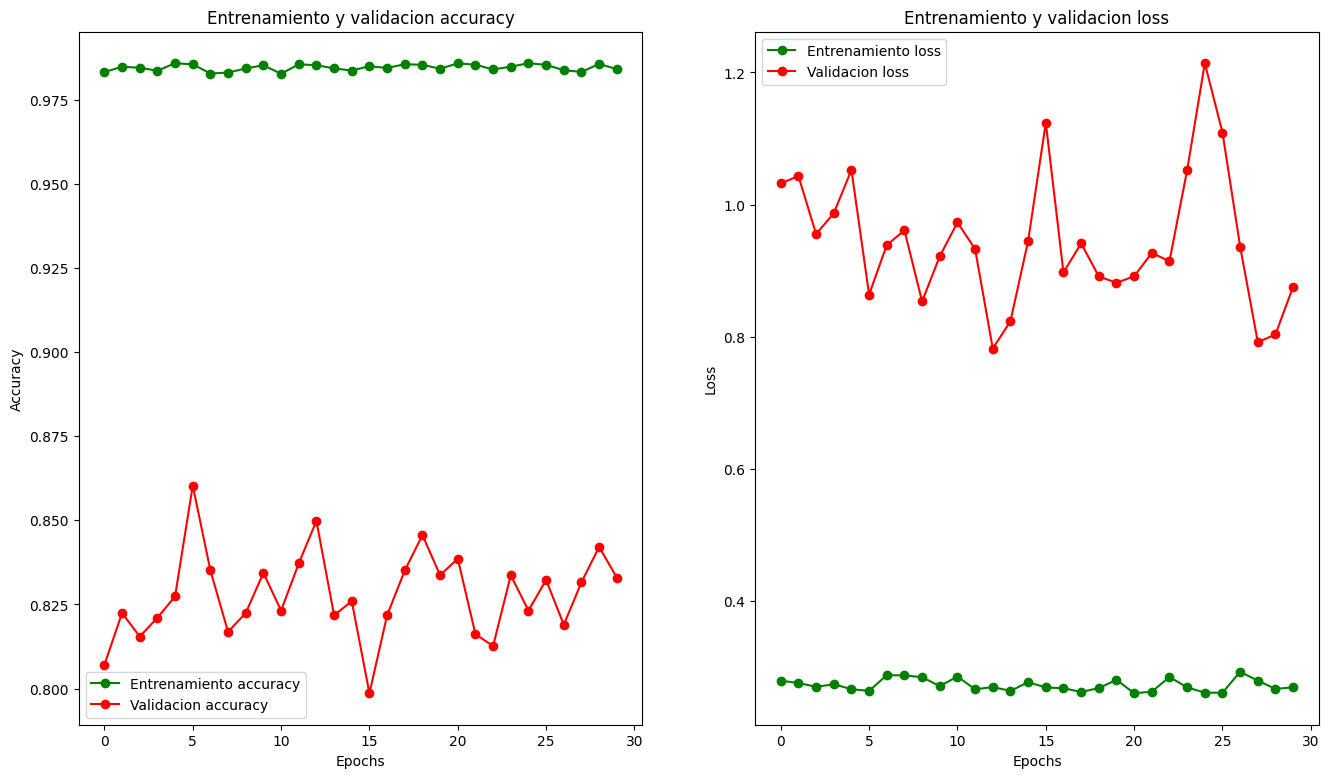

In [58]:
visualice_results(history_convulotional)